In [58]:
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plt
from scipy import sparse

# Problem 1

In [2]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [28]:
def jacobi(A,b,tol,maxiters):
    Dinv=np.diag(1/np.diag(A))
    x=np.zeros(len(b))
    xnew=np.ones(len(b))
    i=0
    while la.norm(xnew-x,np.inf)>tol and i<maxiters:
        x=xnew
        xnew=x+np.dot(Dinv,b-np.dot(A,x))
        i+=1
    return xnew

In [59]:
Atest=diag_dom(100)
btest=np.random.random(100)

In [60]:
x=jacobi(Atest,btest,1e-10,2000)
np.allclose(btest,np.dot(Atest,x))

True

# Problem 2

In [40]:
def jacobi1(A,b,tol,maxiters,plot=False):
    Dinv=np.diag(1/np.diag(A))
    x=np.zeros(len(b))
    xnew=np.ones(len(b))
    i=0
    errors=np.array([])
    while la.norm(xnew-x,np.inf)>tol and i<maxiters:
        x=xnew
        xnew=x+np.dot(Dinv,b-np.dot(A,x))
        if plot==True:
            error=la.norm(np.dot(A,xnew)-b,np.inf)
            errors=np.append(errors,[error])
        i+=1
    if plot==True:
        plt.semilogy(errors)
        plt.xlabel('Iteration')
        plt.ylabel('Errors')
        plt.show()
    return xnew

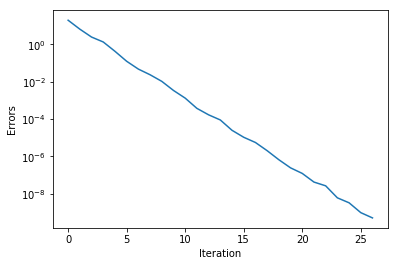

array([ 0.08063152,  0.05507578,  0.01218295,  0.00587956,  0.02076373,
        0.11220177,  0.02247909,  0.02616764,  0.04275834,  0.00383958,
        0.06378384,  0.04295855,  0.09021344,  0.02630036,  0.05339362,
        0.04866681,  0.03807257,  0.04279174,  0.05831943,  0.0518736 ,
        0.04402799,  0.05935514,  0.04811361,  0.02556404,  0.01259769,
        0.03353038,  0.03448577,  0.16952954,  0.07855551,  0.05528948,
        0.01902199,  0.03682726,  0.05973093,  0.04835019, -0.01053096,
        0.02012708,  0.06839033,  0.01203868,  0.06961174,  0.01846337,
        0.03754981,  0.10448   ,  0.02462506,  0.06405043,  0.0375057 ,
        0.06614335, -0.00497411,  0.02249322, -0.00735175,  0.05800795,
        0.00549122,  0.01046214,  0.03389119,  0.00460302,  0.04809538,
        0.04420489,  0.08691205,  0.01261111,  0.02842485,  0.00681268,
        0.02674961, -0.00455236,  0.04598129,  0.01250291,  0.04317759,
        0.12115036,  0.04243278,  0.0631665 ,  0.04905584,  0.01

In [61]:
jacobi1(Atest,btest,1e-10,200,plot=True)

# Problem 3

In [56]:
def gauss_seidel(A,b,plot=False,tol=1e-10,maxiters=200):
    x=np.ones(len(b))
    xnew=np.zeros(len(b))
    i=0
    errors=np.array([])
    while la.norm(xnew-x,np.inf)>tol and i<maxiters:
        x=np.copy(xnew)
        for i in range(len(b)):
            xnew[i]=x[i]+(1/A[i,i])*(b[i]-np.dot(A[i,:],x))
        if plot==True:
            error=la.norm(np.dot(A,xnew)-b, np.inf)
            errors=np.append(errors,[error])
        i+=1
    if plot==True:
        plt.semilogy(errors)
        plt.xlabel('Iteration')
        plt.ylabel('Errors')
        plt.show()
    return xnew

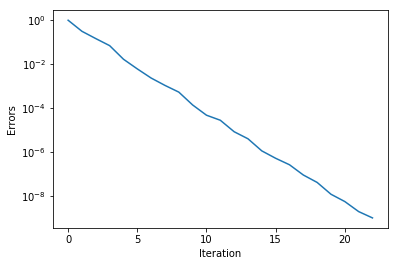

True

In [62]:
x=gauss_seidel(Atest,btest,plot=True)
np.allclose(btest,np.dot(Atest,x))

# Problem 4

In [99]:
def gs_sparse(A,b,plot=False,tol=1e-10,maxiters=2000):
    x=np.ones(len(b))
    xnew=np.zeros(len(b))
    i=0
    errors=np.array([])
    while la.norm(xnew-x,np.inf)>tol and i<maxiters:
        x=np.copy(xnew)
        for i in range(len(b)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            xnew[i]=x[i]+(1/A.diagonal()[i])*(b[i]-Aix)
        if plot==True:
            error=la.norm(A.dot(x)-b, np.inf)
            errors=np.append(errors,[error])
        i+=1
    if plot==True:
        plt.semilogy(errors)
        plt.xlabel('Iteration')
        plt.ylabel('Errors')
        plt.show()
    return xnew

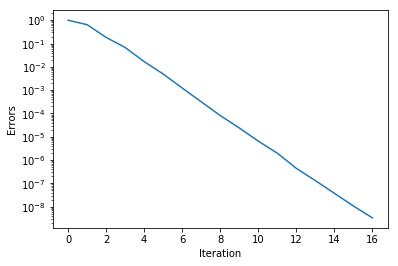

True

In [100]:
Asparse=sparse.csr_matrix(diag_dom(500))
bsparse=np.random.random(500)
xsparse=gs_sparse(Asparse,bsparse,plot=True)
np.allclose(Asparse.dot(xsparse),bsparse)

# Problem 5

In [222]:
def gs_sparse_relaxed(A,b,w,plot=False,tol=1e-10,maxiters=2000):
    x=np.ones(len(b))
    xnew=np.zeros(len(b))
    iters=0
    errors=np.array([])
    while la.norm(xnew-x,np.inf)>tol and iters<maxiters:
        x=np.copy(xnew)
        for i in range(len(b)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            ### Multiply the relaxation factor:
            xnew[i]=x[i]+w*(1/A.diagonal()[i])*(b[i]-Aix)
        if plot==True:
            error=la.norm(A.dot(x)-b, np.inf)
            errors=np.append(errors,[error])
        iters+=1
    if plot==True:
        plt.semilogy(errors)
        plt.xlabel('Iteration')
        plt.ylabel('Errors')
        plt.show()
    return xnew,iters

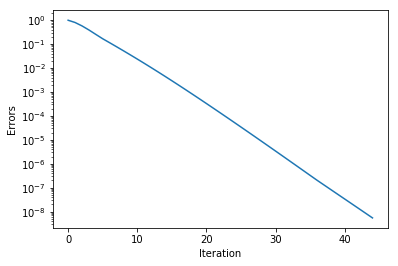

(True, 45)

In [223]:
xsparser, iternos=gs_sparse_relaxed(Asparse,bsparse,0.5,plot=True)
np.allclose(Asparse.dot(xsparser),bsparse), iternos

# Problem 6

In [215]:
def heatsolve(n, w, plot=False, tol=1e-2, maxiters=500):
    B=sparse.diags([1,-4,1],[-1,0,1],shape=(n,n))
    A = sparse.bmat([[B if i == j else sparse.eye(n) if abs(i-j)==1
                else None for i in range(n)]
                for j in range(n)], format='bsr')
    A=sparse.csr_matrix(A)
    bs=np.zeros(n)
    bs[0]=-100
    bs[-1]=-100
    b=np.tile(bs,n)
    u, iters=gs_sparse_relaxed(A,b,w,plot=False, tol=1e-8, maxiters=maxiters)
    if plot==True:
        uplot=u.reshape(n,n)
        plt.pcolormesh(uplot, cmap='coolwarm')
        plt.colorbar()
        plt.show()
    return u, iters

# Problem 7

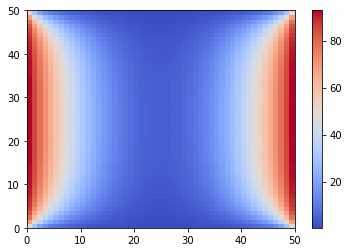

array([ 49.74640032,  29.73055899,  20.19015502, ...,  20.19015502,
        29.73055899,  49.74640032])

In [225]:
w=np.linspace(1,1.95,20)
heat=np.vectorize(heatsolve)
plt.plot(w, heat(20,w)[1])
plt.show